In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [ ]:
so = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/대출목록.csv')
best = pd.read_csv('/content/drive/My Drive/소통형도서관_프로젝트/자료/베스트_이용도서.csv')

In [ ]:
bestb = best.loc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,54,55,56,57,58,59,60]]
bestb.tail(5)

,등록번호,서명,청구기호,저자,출판사,출판년도,유형,이용빈도
56,778007,청춘을 위한 나라는 없다 청년논객 한윤형의 잉여탐구생활,305.242 한67ㅊ,한윤형,어크로스,2013,305.242,11
57,797549,트렌드 코리아 . 2019,330.951 김21ㅌ 2019,김난도,미래의창,2018,330.951,11
58,797955,12가지 인생의 법칙 : 혼돈의 해독제,179.9 P485tKㄱ,"Peterson, Jordan B",메이븐,2018,179.9,11
59,793774,한때 소중했던 것들 : 이기주 산문집,818.7 이197ㅎ,이기주,달,2018,818.7,11
60,800470,아가씨와 밤 : 기욤 뮈소 장편소설,843.914 M989jKㅇ,"Musso, Guillaume",밝은세상,2018,843.914,11


In [ ]:
best50 = best.iloc[0:50, :]
best50_3 = best50.loc[:,['서명','이용빈도','유형']]
best50_3.head(6)

,서명,이용빈도,유형
0,나는 나로 살기로 했다 : 냉담한 현실에서 어른살이를 위한 to do list,20,818.7
1,돌이킬 수 없는 약속 : 야쿠마루 가쿠 장편소설,20,895.636
2,82년생 김지영 : 조남주 장편소설,19,813.7
3,죽고 싶지만 떡볶이는 먹고 싶어 : 백세희 에세이,17,818.7
4,아몬드 : 손원평 장편소설,16,813.7
5,언어의 온도,16,818.7


#지난 2018-06-01 ~ 2019-09-30 까지의 대출데이터

In [ ]:
so.head(4)

,학과,등록번호,청구기호,서명,저자,대출일
0,간호학과,569943,158.2 하69ㅍKㄱ,대화기술: 생각을 전하고 마음을 사로잡는 기술,하이브로 무사시,20180710
1,간호학과,594738,910.41 한49ㅂ 2007,바람의 딸 걸어서 지구 세바퀴 반,한비야,20180801
2,간호학과,587517,181.2184 맹71시,孟子論,신동준,20180601
3,간호학과,604495,320.1 M149pKㅅ,(가장 정직한 정치 교과서) 군주론,신재일,20180604


In [ ]:
so_1 = so.iloc[:, :]
so_2 = so.loc[:,['학과','청구기호','서명','대출일']]

##공과대학 대여권수

In [ ]:
so_eg = so_2[so_2['학과'].isin(['산업경영공학과','컴퓨터공학과','정보통신공학과','멀티미디어공학전공','멀티미디어학부','멀티미디어영상전공',
                                   '토목·건축공학부','미디어영상전공','전기전자공학과' ,'건축공학전공',
                                   '토목환경공학전공','기계공학과','화학공학과','컴퓨터무인통신기술학과'])]

#신규인'신소재공학과','스마트융합공학부'제외 , 재학생이 없을것으로 판단 '공학교육 혁신센터 제외'
so_eg.shape

(1344, 4)

##사범대학 대여권수

In [ ]:
so_edu = so_2[so_2['학과'].isin(['국어교육과','영어교육과','교육학과','역사교육과','미술교육과','수학교육과'])]
#교육연수원, 교직부 제외
so_edu.shape

(2976, 4)

##문과대학 대여권수

In [ ]:
so_la =  so_2[so_2['학과'].isin(['국어국문·창작학과','영어영문학과','외국어문학부','일어일문학전공','프랑스어문학전공',
                                    '문헌정보학과','사학과','기독교학과','인문학부 철학상담학전공','일본·프랑스어문학과'])]
so_la.shape

(4758, 4)

##경상대학 대여권수

In [ ]:
so_ec =  so_2[so_2['학과'].isin(['경영학과','회계학과','무역학과','경제학부','경제학전공',
                                    '중국경제통상학전공','컨벤션호텔경영학과','비즈니스통계학과'])]
#방촌국제화 훈련단 제외
so_ec.shape

(2395, 4)

##법정대학 대여권수

In [ ]:
so_ss =  so_2[so_2['학과'].isin(['법학부','행정·경찰학부' '행정학전공','경찰학전공 모집전공','정치·언론학과' ,'사회복지학과','아동복지학과','도시부동산학과'])]
so_ss.shape

(1778, 4)

##생명나노과학대학 대여권수

In [ ]:
so_ls =  so_2[so_2['학과'].isin(['생명시스템과학과' ,'식품영양학과','화학과' ,'수학과','간호학과','스포츠과학과','화공신소재공학과'])]
so_ls.shape

(2525, 4)

##사회적경제융합대학 대여권수

In [ ]:
so_se =  so_2[so_2['학과'].isin(['사회복지학과','아동복지학과'])]
                               
#상담심리학과 , 사회적경제기업학과 , 빅데이터응용학과 신규 생성학과 제외
so_se.shape

(820, 4)

##린튼글로벌비지니스 대여권수

In [ ]:
so_gb =  so_2[so_2['학과'].isin(['글로벌비즈니스전공','글로벌IT경영전공'])]
so_gb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
학과      0 non-null object
청구기호    0 non-null object
서명      0 non-null object
대출일     0 non-null object
dtypes: object(4)
memory usage: 0.0+ bytes


##조형예술학부 대여권수

In [ ]:
so_art =  so_2[so_2['학과'].isin(['조형예술학부','융합디자인전공','회화전공','의류학전공'])]
so_art.shape

(860, 4)

##자유전공학부 대여권수

In [ ]:
so_free =  so_2[so_2['학과'].isin(['자유전공학부'])]
so_free.shape

(60, 4)

## 정리

1)so_eg #공과대

2)so_edu #사범대

3)so_la #문과대

4)so_ec #경상대학

5)so_ss #법정대학

6)so_ls #생명나노대학

7)so_se #사회적경제융합대학

8)so_gb #린튼글로벌비지니스 - 값이 없음 

9)so_art #조형예술학부

10)so_free #자유전공학부


위 결과에 등장하듯 링크사업단이나 신규모집 학과, 학생이 소속하지 않은 대학부, 다전공으로 이루어진 DH-SCHOOL 등등

실질적 홍보대상이 아닌 대상은 분석에서 제외 

In [ ]:
so_maj = pd.concat([so_eg,so_edu,so_la,so_ec ,so_ss,so_ls , so_se,so_gb , so_art, so_free] )
so_maj1=so_maj.reset_index()

전체 29951권에서 실질적으로 재학생이 빌려간 권수는 17516권 뿐임을 알 수 있다.

In [ ]:
so_maj2 = so_maj1.drop_duplicates(['서명'], keep = False)
so_maj2.shape

(7023, 5)

In [ ]:
so_book_bin = so_maj1.groupby(['서명']).size().reset_index()
so_book_bin.rename(columns = {0: '빈도'}, inplace = True)

https://m.blog.naver.com/PostView.nhn?blogId=nonamed0000&logNo=220917041986&proxyReferer=https%3A%2F%2Fwww.google.com%2F
  
  
  다음시간에 이어서 책서명으로 빈도표 그리기

In [ ]:
so1025 = so_book_bin.sort_values(by = ['빈도'],ascending = False)

In [ ]:
SO15 = so1025.head(16)
SO15.head(16)

,서명,빈도
3260,군주론,47
6805,어린왕자,42
6956,역사란 무엇인가,39
8146,정령왕 엘퀴네스: 이환 판타지 장편소설,34
1939,7년의 밤 정유정 장편소설,30
4212,대한민국史 : 한홍구의 역사이야기,29
8651,짜라투스트라는 이렇게 말했다,29
9775,해리포터와 마법사의 돌,29
4025,니코마코스 윤리학,27
2754,감시와 처벌 : 감옥의 역사,26


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

Matplotlib version 3.1.1
sys_font number: 49
nanum_font number: 31


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44400 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text

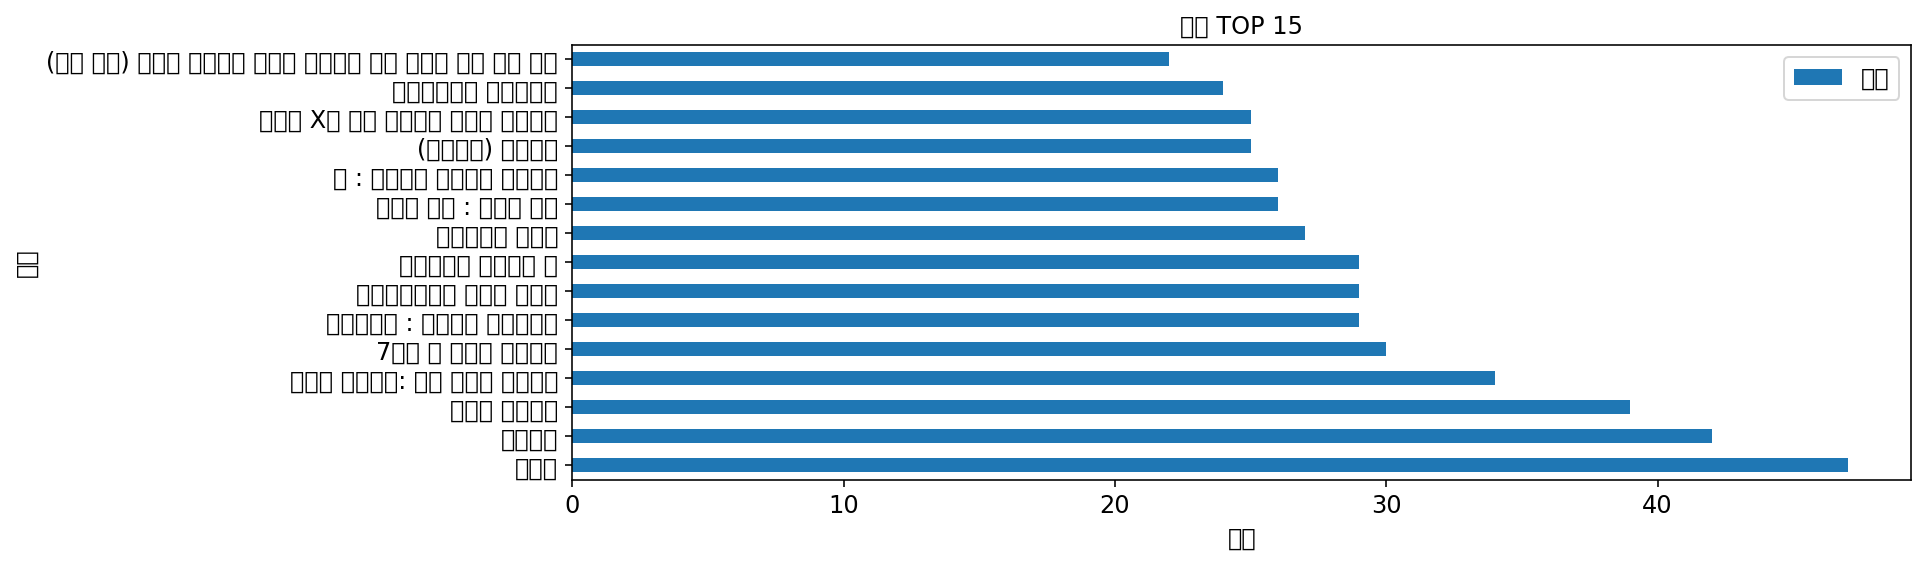

In [ ]:
ax = SO15.plot(kind='barh', x='서명', y='빈도', title='빈도 TOP 15', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('빈도', fontsize=12)          # x축 정보 표시
ax.set_ylabel('서명', fontsize=12)     # y축 정보 표시
ax.legend(['서명'], fontsize=12)    # 범례 지정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_

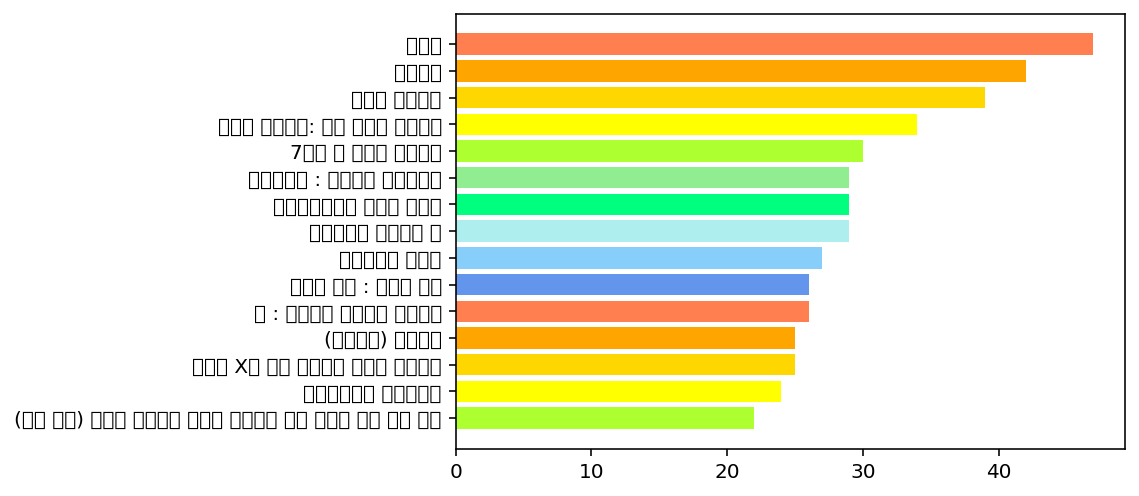

In [ ]:
SO15r = pd.DataFrame(SO15, 
                     index=[926,9258,7317,632,6399,2754,4025,9775,8651,4212,1939,8146,6956,6805,3260])
height = SO15r["빈도"]
bars = SO15r["서명"]
y_pos = np.arange(len(bars))
plt.barh(y_pos, height, 
         color=[ 'greenyellow','yellow','gold', 'orange', 'coral','cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'])
#plt.barh(y_pos, height, color=['black','red', 'green', 'blue'])
plt.yticks(y_pos, bars)
plt.show()

findfont: Font family ['Nanum Gothic Eco'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


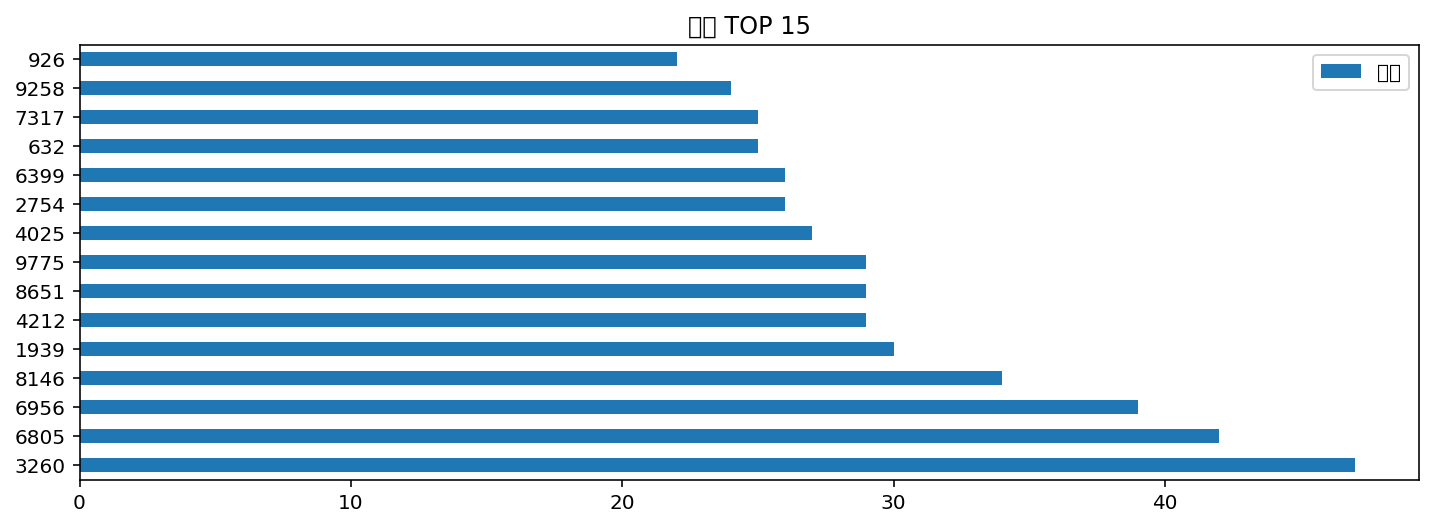

In [ ]:
SO15.plot(kind='barh',title='빈도 TOP 15')